In [5]:
import torch
from torch import optim, nn
from functools import partial
from initialize import *
from classes import *
from data_proc import *
from tqdm import tqdm

In [252]:
model = nn.Linear(10, 5)

optimizer = optim.SGD(model.parameters(), lr=1)
criterion = nn.CrossEntropyLoss()

In [253]:
old = model.weight.detach().clone()
old

tensor([[-0.1922, -0.0244,  0.1427, -0.1275, -0.1680, -0.1448,  0.3027, -0.0618,
          0.0321,  0.2736],
        [-0.2548,  0.1016,  0.1874,  0.1151,  0.0753, -0.1704, -0.1242, -0.0014,
         -0.0504,  0.2900],
        [-0.2566,  0.2901,  0.2249, -0.0976, -0.2419, -0.1379, -0.0907, -0.2692,
          0.2005, -0.2647],
        [-0.2032, -0.1043,  0.0273, -0.2816, -0.3070, -0.0194,  0.1192, -0.2898,
         -0.0006,  0.1752],
        [ 0.3029,  0.2622,  0.1841, -0.1187,  0.0830,  0.1624, -0.2479, -0.1528,
          0.2537,  0.0968]])

In [254]:
model.weight.grad

In [255]:
def hook(grad, cond):
    print("hook")
    grad[:cond[0]] = 0
    grad[cond[1]:] = 0
    return grad


target_sep = [(0,1), (2,3)]

h = model.weight.register_hook(partial(hook, cond=target_sep[0]))

In [256]:
optimizer.zero_grad()
loss = criterion(model(torch.rand((1, 10))), torch.tensor([2], dtype=int))
model.train()
loss.backward()
optimizer.step()

hook


In [257]:
(model.weight - old).mean(axis=-1)

tensor([-0.1003,  0.0000,  0.0000,  0.0000,  0.0000], grad_fn=<MeanBackward1>)

In [258]:
model.weight.grad

tensor([[0.1053, 0.0097, 0.1441, 0.0339, 0.1870, 0.1779, 0.1774, 0.0491, 0.0293,
         0.0894],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]])

In [259]:
model.weight

Parameter containing:
tensor([[-0.2975, -0.0341, -0.0014, -0.1613, -0.3550, -0.3228,  0.1253, -0.1109,
          0.0028,  0.1842],
        [-0.2548,  0.1016,  0.1874,  0.1151,  0.0753, -0.1704, -0.1242, -0.0014,
         -0.0504,  0.2900],
        [-0.2566,  0.2901,  0.2249, -0.0976, -0.2419, -0.1379, -0.0907, -0.2692,
          0.2005, -0.2647],
        [-0.2032, -0.1043,  0.0273, -0.2816, -0.3070, -0.0194,  0.1192, -0.2898,
         -0.0006,  0.1752],
        [ 0.3029,  0.2622,  0.1841, -0.1187,  0.0830,  0.1624, -0.2479, -0.1528,
          0.2537,  0.0968]], requires_grad=True)

In [260]:
old

tensor([[-0.1922, -0.0244,  0.1427, -0.1275, -0.1680, -0.1448,  0.3027, -0.0618,
          0.0321,  0.2736],
        [-0.2548,  0.1016,  0.1874,  0.1151,  0.0753, -0.1704, -0.1242, -0.0014,
         -0.0504,  0.2900],
        [-0.2566,  0.2901,  0.2249, -0.0976, -0.2419, -0.1379, -0.0907, -0.2692,
          0.2005, -0.2647],
        [-0.2032, -0.1043,  0.0273, -0.2816, -0.3070, -0.0194,  0.1192, -0.2898,
         -0.0006,  0.1752],
        [ 0.3029,  0.2622,  0.1841, -0.1187,  0.0830,  0.1624, -0.2479, -0.1528,
          0.2537,  0.0968]])

In [236]:
num_tasks = 10
set_size = 100 // num_tasks
target_sep = [(i*set_size, (i+1)*set_size) for i in range(num_tasks)]
target_sep[-1] = (target_sep[-1][0], 100)

In [237]:
target_sep

[(0, 10),
 (10, 20),
 (20, 30),
 (30, 40),
 (40, 50),
 (50, 60),
 (60, 70),
 (70, 80),
 (80, 90),
 (90, 100)]

In [240]:
a = torch.rand((4, 5))
a

tensor([[0.2727, 0.9049, 0.7966, 0.5810, 0.3650],
        [0.7375, 0.4366, 0.7186, 0.0105, 0.7604],
        [0.7147, 0.4369, 0.4764, 0.1091, 0.3966],
        [0.7021, 0.5749, 0.9472, 0.8856, 0.3974]])

In [244]:
a[0:1, 4:5]

tensor([[0.3650]])

In [265]:
import numpy as np

0.95**40

0.12851215656510312

# Test new evaluation

In [6]:
from data_proc import *
from train import *

In [3]:
model = create_model("resnet")

In [4]:
loaders = create_loaders()

100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


In [5]:
evaluate(model, "cpu", loaders["val"][0])

tensor([0.])

In [6]:
evaluate_all_tasks(model, "cpu", loaders["val"])

tensor([0.0000, 0.0000, 0.0676, 0.0000, 0.0000, 0.0000, 0.0060, 0.0000, 0.0000,
        0.0147])

In [13]:
print(model.top_layers[1].weight.grad[0].mean(axis=-1))


TypeError: 'NoneType' object is not subscriptable

In [20]:
model.top_layers[1].weight.shape

torch.Size([100, 1000])

## Type of train return values?

In [7]:
dataloaders = create_loaders()


100%|██████████| 10/10 [00:02<00:00,  4.93it/s]


In [8]:
model = create_model("resnet")

optimizer = optim.SGD(model.parameters(), lr=1)
scheduler = setup_scheduler(optimizer, mode="cil")

criterion = nn.CrossEntropyLoss()

In [9]:
trainer = ExperimentTrainer(dataloaders, model, optimizer, scheduler, criterion, "cpu", 1)

In [10]:
loss, train_acc, val_acc = trainer.train_class_inc(num_epochs_per_task=1)

100%|██████████| 1/1 [03:53<00:00, 233.26s/it]


Epoch 0: loss =  2.88, train_acc = 0.10, val_acc = 0.11
Finished training on task 0... val_accuracy on task 0 = 0.108


100%|██████████| 1/1 [03:43<00:00, 223.37s/it]


Epoch 0: loss =  2.56, train_acc = 0.10, val_acc = 0.08
Finished training on task 1... val_accuracy on task 0 = 0.000


100%|██████████| 1/1 [03:53<00:00, 233.70s/it]


Epoch 0: loss =  4.12, train_acc = 0.10, val_acc = 0.10
Finished training on task 2... val_accuracy on task 0 = 0.000


100%|██████████| 1/1 [03:47<00:00, 227.76s/it]


Epoch 0: loss = 12.03, train_acc = 0.10, val_acc = 0.10
Finished training on task 3... val_accuracy on task 0 = 0.004


100%|██████████| 1/1 [03:47<00:00, 227.64s/it]


Epoch 0: loss =  2.81, train_acc = 0.10, val_acc = 0.11
Finished training on task 4... val_accuracy on task 0 = 0.000


100%|██████████| 1/1 [03:45<00:00, 225.28s/it]


Epoch 0: loss =  2.57, train_acc = 0.10, val_acc = 0.07
Finished training on task 5... val_accuracy on task 0 = 0.000


100%|██████████| 1/1 [03:47<00:00, 227.13s/it]


Epoch 0: loss =  2.60, train_acc = 0.10, val_acc = 0.09
Finished training on task 6... val_accuracy on task 0 = 0.000


100%|██████████| 1/1 [03:45<00:00, 225.87s/it]


Epoch 0: loss =  2.61, train_acc = 0.10, val_acc = 0.10
Finished training on task 7... val_accuracy on task 0 = 0.000


100%|██████████| 1/1 [03:46<00:00, 226.49s/it]


Epoch 0: loss =  2.53, train_acc = 0.10, val_acc = 0.11
Finished training on task 8... val_accuracy on task 0 = 0.000


100%|██████████| 1/1 [03:45<00:00, 225.25s/it]

Epoch 0: loss =  2.83, train_acc = 0.11, val_acc = 0.09
Finished training on task 9... val_accuracy on task 0 = 0.000


In [11]:
print(val_acc)

tensor([[0.1083, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0781, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0999, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0040, 0.0000, 0.0000, 0.0954, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1139, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0144, 0.0746, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0895, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1027, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1089,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0943]])


In [4]:
replay_loaders = create_replay_loaders()

TypeError: create_replay_loaders() missing 2 required positional arguments: 'dataset' and 'name'

In [9]:
dataloaders = create_loaders()


100%|██████████| 10/10 [00:01<00:00,  6.23it/s]


In [10]:
for d in tqdm(dataloaders["val"]):
    all_labels = set()
    for _, labels in d:
        all_labels.update(labels.tolist() if isinstance(labels, torch.Tensor) else labels)
    print(all_labels)

 10%|█         | 1/10 [00:01<00:10,  1.20s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


 20%|██        | 2/10 [00:01<00:04,  1.67it/s]

{10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


 30%|███       | 3/10 [00:01<00:02,  2.47it/s]

{20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


 40%|████      | 4/10 [00:01<00:01,  3.17it/s]

{32, 33, 34, 35, 36, 37, 38, 39, 30, 31}


 50%|█████     | 5/10 [00:01<00:01,  3.84it/s]

{40, 41, 42, 43, 44, 45, 46, 47, 48, 49}


 60%|██████    | 6/10 [00:02<00:00,  4.38it/s]

{50, 51, 52, 53, 54, 55, 56, 57, 58, 59}


 70%|███████   | 7/10 [00:02<00:00,  4.77it/s]

{64, 65, 66, 67, 68, 69, 60, 61, 62, 63}


 80%|████████  | 8/10 [00:02<00:00,  5.03it/s]

{70, 71, 72, 73, 74, 75, 76, 77, 78, 79}


 90%|█████████ | 9/10 [00:02<00:00,  5.18it/s]

{80, 81, 82, 83, 84, 85, 86, 87, 88, 89}


100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

{96, 97, 98, 99, 90, 91, 92, 93, 94, 95}


In [18]:
i = 10 
for d in tqdm(create_loaders(replay=True)["train"]):
    all_labels = set()
    for _, labels in d:
        all_labels.update(labels.tolist() if isinstance(labels, torch.Tensor) else labels)
    print(all_labels)
    print(all_labels == set(range(0, i)))
    i += 10

 10%|█         | 1/10 [00:02<00:19,  2.12s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
True


 20%|██        | 2/10 [00:04<00:20,  2.53s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
True


 30%|███       | 3/10 [00:08<00:21,  3.02s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
True


 40%|████      | 4/10 [00:13<00:22,  3.71s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
True


 50%|█████     | 5/10 [00:19<00:22,  4.51s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
True


 60%|██████    | 6/10 [00:26<00:21,  5.38s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
True


 70%|███████   | 7/10 [00:34<00:19,  6.34s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
True


 80%|████████  | 8/10 [00:44<00:14,  7.37s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
True


 90%|█████████ | 9/10 [00:54<00:08,  8.39s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}
True


100%|██████████| 10/10 [01:06<00:00,  6.66s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
True


In [17]:
for d, _ in create_loaders(replay=True)["val"][1]:
    print(d.shape)
    break

100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


torch.Size([32, 3, 32, 32])


In [5]:
import torch
from torch import optim, nn
from functools import partial
from initialize import *
from classes import *
from data_proc import *
import numpy as np
import matplotlib.pyplot as plt

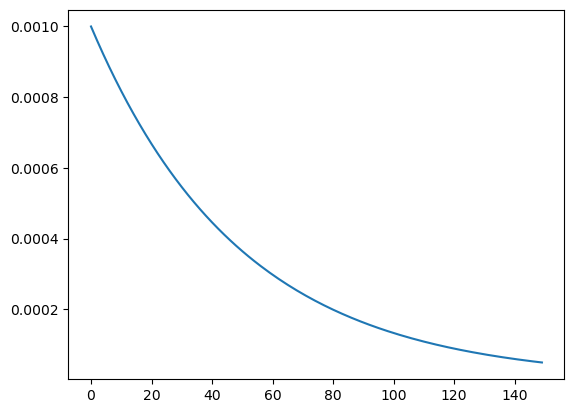

In [9]:
model = torch.nn.Linear(10, 1)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

n = 60
lr_vals = np.zeros(150)

sheduler = setup_scheduler(optimizer)

for i in range(150):
    lr_vals[i] = optimizer.param_groups[0]["lr"]    
    optimizer.step()
    sheduler.step()


plt.plot(lr_vals)

In [4]:
import torch
from torch import optim, nn
from functools import partial
from initialize import *
from classes import *
from data_proc import *
import numpy as np
import matplotlib.pyplot as plt


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = "cpu"

dataloaders = create_loaders(replay=True)

model = create_model("resnet")

optim = setup_optimizer(model.parameters(), lr=1e-3)
scheduler = setup_scheduler(optim, mode="cil")

trainer = ExperimentTrainer(dataloaders,
                            model.to(device), 
                            optim,
                            scheduler,
                            nn.NLLLoss(),
                            device,
                            1
                           )

100%|██████████| 10/10 [00:00<00:00, 1601.98it/s]


In [ ]:
loss, acc_train, acc_val = trainer.train_class_inc_hook(num_epochs_per_task=1)

100%|██████████| 1/1 [07:47<00:00, 467.54s/it]

Epoch 0: loss =  2.63, train_acc = 0.16, val_acc = 0.19


weight [0.00935885775834322, 0.0016997578786686063, 0.001813769107684493, 0.0025209845043718815, 0.00200445344671607, 0.0016068790573626757, 0.001717822509817779, 0.0018687855917960405, 0.0020108502358198166, 0.0016985138645395637]
weight_grad [0.3033718466758728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
bias [0.06424297392368317, 0.0401483029127121, 0.05465194955468178, 0.06939250230789185, 0.054118309170007706, 0.06487385928630829, 0.07133140414953232, 0.04942026734352112, 0.05537419393658638, 0.04644381254911423]
bias_grad [0.36816704273223877, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Finished training on task 0... val_accuracy on task 0 = 0.190


100%|██████████| 1/1 [08:05<00:00, 485.14s/it]


Epoch 0: loss =  3.08, train_acc = 0.10, val_acc = 0.13
weight [0.00968204066157341, 0.011954601854085922, 0.001813769107684493, 0.0025209845043718815, 0.00200445344671607, 0.0016068790573626757, 0.001717822509817779, 0.0018687855917960405, 0.0020108502358198166, 0.0016985138645395637]
weight_grad [0.0, 0.060717977583408356, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
bias [0.06591961532831192, 0.06557057052850723, 0.05465194955468178, 0.06939250230789185, 0.054118309170007706, 0.06487385928630829, 0.07133140414953232, 0.04942026734352112, 0.05537419393658638, 0.04644381254911423]
bias_grad [0.0, 0.12462624907493591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Finished training on task 1... val_accuracy on task 0 = 0.104


100%|██████████| 1/1 [08:24<00:00, 504.26s/it]


Epoch 0: loss =  3.11, train_acc = 0.09, val_acc = 0.15
weight [0.00968204066157341, 0.012071567587554455, 0.0036029485054314137, 0.0025209845043718815, 0.00200445344671607, 0.0016068790573626757, 0.001717822509817779, 0.0018687855917960405, 0.0020108502358198166, 0.0016985138645395637]
weight_grad [0.0, 0.0, 0.046907927840948105, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
bias [0.06591961532831192, 0.06520400941371918, 0.0788298100233078, 0.06939250230789185, 0.054118309170007706, 0.06487385928630829, 0.07133140414953232, 0.04942026734352112, 0.05537419393658638, 0.04644381254911423]
bias_grad [0.0, 0.0, 0.12292660772800446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Finished training on task 2... val_accuracy on task 0 = 0.092


100%|██████████| 1/1 [08:42<00:00, 522.59s/it]


Epoch 0: loss =  3.28, train_acc = 0.09, val_acc = 0.13
weight [0.00968204066157341, 0.012071567587554455, 0.00368257868103683, 0.005548589397221804, 0.00200445344671607, 0.0016068790573626757, 0.001717822509817779, 0.0018687855917960405, 0.0020108502358198166, 0.0016985138645395637]
weight_grad [0.0, 0.0, 0.0, 0.02967817150056362, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
bias [0.06591961532831192, 0.06520400941371918, 0.07897179573774338, 0.09204164892435074, 0.054118309170007706, 0.06487385928630829, 0.07133140414953232, 0.04942026734352112, 0.05537419393658638, 0.04644381254911423]
bias_grad [0.0, 0.0, 0.0, 0.08548986911773682, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Finished training on task 3... val_accuracy on task 0 = 0.075


100%|██████████| 1/1 [09:03<00:00, 543.21s/it]


Epoch 0: loss =  3.77, train_acc = 0.07, val_acc = 0.10
weight [0.00968204066157341, 0.012071567587554455, 0.00368257868103683, 0.005416464991867542, 0.005250024609267712, 0.0016068790573626757, 0.001717822509817779, 0.0018687855917960405, 0.0020108502358198166, 0.0016985138645395637]
weight_grad [0.0, 0.0, 0.0, 0.0, 0.017462559044361115, 0.0, 0.0, 0.0, 0.0, 0.0]
bias [0.06591961532831192, 0.06520400941371918, 0.07897179573774338, 0.0914885550737381, 0.0729016438126564, 0.06487385928630829, 0.07133140414953232, 0.04942026734352112, 0.05537419393658638, 0.04644381254911423]
bias_grad [0.0, 0.0, 0.0, 0.0, 0.052772168070077896, 0.0, 0.0, 0.0, 0.0, 0.0]
Finished training on task 4... val_accuracy on task 0 = 0.149


100%|██████████| 1/1 [09:21<00:00, 561.55s/it]


Epoch 0: loss =  3.77, train_acc = 0.09, val_acc = 0.13
weight [0.00968204066157341, 0.012071567587554455, 0.00368257868103683, 0.005416464991867542, 0.005241538863629103, 0.006572357844561338, 0.001717822509817779, 0.0018687855917960405, 0.0020108502358198166, 0.0016985138645395637]
weight_grad [0.0, 0.0, 0.0, 0.0, 0.0, 0.019730418920516968, 0.0, 0.0, 0.0, 0.0]
bias [0.06591961532831192, 0.06520400941371918, 0.07897179573774338, 0.0914885550737381, 0.07633239775896072, 0.0888744443655014, 0.07133140414953232, 0.04942026734352112, 0.05537419393658638, 0.04644381254911423]
bias_grad [0.0, 0.0, 0.0, 0.0, 0.0, 0.0748891606926918, 0.0, 0.0, 0.0, 0.0]
Finished training on task 5... val_accuracy on task 0 = 0.088


100%|██████████| 1/1 [09:41<00:00, 581.43s/it]


Epoch 0: loss =  3.64, train_acc = 0.09, val_acc = 0.14
weight [0.00968204066157341, 0.012071567587554455, 0.00368257868103683, 0.005416464991867542, 0.005241538863629103, 0.0066057173535227776, 0.004691882524639368, 0.0018687855917960405, 0.0020108502358198166, 0.0016985138645395637]
weight_grad [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016300031915307045, 0.0, 0.0, 0.0]
bias [0.06591961532831192, 0.06520400941371918, 0.07897179573774338, 0.0914885550737381, 0.07633239775896072, 0.09263142943382263, 0.08691031485795975, 0.04942026734352112, 0.05537419393658638, 0.04644381254911423]
bias_grad [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04982643574476242, 0.0, 0.0, 0.0]
Finished training on task 6... val_accuracy on task 0 = 0.110


100%|██████████| 1/1 [09:59<00:00, 599.43s/it]


Epoch 0: loss =  3.49, train_acc = 0.12, val_acc = 0.18
weight [0.00968204066157341, 0.012071567587554455, 0.00368257868103683, 0.005416464991867542, 0.005241538863629103, 0.0066057173535227776, 0.0045742071233689785, 0.005121118389070034, 0.0020108502358198166, 0.0016985138645395637]
weight_grad [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011492238380014896, 0.0, 0.0]
bias [0.06591961532831192, 0.06520400941371918, 0.07897179573774338, 0.0914885550737381, 0.07633239775896072, 0.09263142943382263, 0.08885946124792099, 0.10138239711523056, 0.05537419393658638, 0.04644381254911423]
bias_grad [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04660345986485481, 0.0, 0.0]
Finished training on task 7... val_accuracy on task 0 = 0.102


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
loss, acc_train, acc_val

In [2]:
for d in tqdm(create_loaders()["val"]):
    all_labels = set()
    for _, labels in d:
        all_labels.update(labels.tolist() if isinstance(labels, torch.Tensor) else labels)
    print(all_labels)

 10%|█         | 1/10 [00:00<00:07,  1.27it/s]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


 20%|██        | 2/10 [00:01<00:06,  1.29it/s]

{10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


 30%|███       | 3/10 [00:02<00:05,  1.31it/s]

{20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


 40%|████      | 4/10 [00:03<00:04,  1.29it/s]

{32, 33, 34, 35, 36, 37, 38, 39, 30, 31}


 50%|█████     | 5/10 [00:03<00:03,  1.27it/s]

{40, 41, 42, 43, 44, 45, 46, 47, 48, 49}


 60%|██████    | 6/10 [00:04<00:03,  1.28it/s]

{50, 51, 52, 53, 54, 55, 56, 57, 58, 59}


 70%|███████   | 7/10 [00:05<00:02,  1.26it/s]

{64, 65, 66, 67, 68, 69, 60, 61, 62, 63}


 80%|████████  | 8/10 [00:06<00:01,  1.27it/s]

{70, 71, 72, 73, 74, 75, 76, 77, 78, 79}


 90%|█████████ | 9/10 [00:07<00:00,  1.25it/s]

{80, 81, 82, 83, 84, 85, 86, 87, 88, 89}


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

{96, 97, 98, 99, 90, 91, 92, 93, 94, 95}


In [3]:
for d in tqdm(create_loaders(replay=True)["val"]):
    all_labels = set()
    for _, labels in d:
        all_labels.update(labels.tolist() if isinstance(labels, torch.Tensor) else labels)
    print(all_labels)

 10%|█         | 1/10 [00:00<00:07,  1.26it/s]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


 20%|██        | 2/10 [00:01<00:07,  1.04it/s]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


 30%|███       | 3/10 [00:03<00:08,  1.17s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


 40%|████      | 4/10 [00:04<00:08,  1.36s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


 50%|█████     | 5/10 [00:06<00:07,  1.58s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}


 60%|██████    | 6/10 [00:09<00:07,  1.82s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}


 70%|███████   | 7/10 [00:11<00:06,  2.05s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}


 80%|████████  | 8/10 [00:14<00:04,  2.33s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}


 90%|█████████ | 9/10 [00:17<00:02,  2.59s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}


100%|██████████| 10/10 [00:21<00:00,  2.13s/it]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


<details>
<summary>Click to expand!</summary>

### This is a collapsible section.
You can include **text**, `code`, or any other markdown content here.

- Item 1
- Item 2
- Item 3



</details>

# me

In [9]:
lknb

NameError: name 'lknb' is not defined

In [10]:
nvfd

NameError: name 'nvfd' is not defined

# not

In [12]:
get_image_shape()

NameError: name 'train_data' is not defined

In [18]:
torch.load("/nfs/scistore23/chlgrp/avolkova/rotation1/pipeline/data/cil/test/6.pt")[0][0].shape

torch.Size([3, 32, 32])

In [25]:
from torchinfo import summary

summary(create_model("vit"), (1, 3, 32, 32))

Layer (type:depth-idx)                                  Output Shape              Param #
MyModel                                                 [1, 100]                  --
├─Identity: 1-1                                         [1, 3, 32, 32]            --
├─TinyVit: 1-2                                          [1, 1000]                 --
│    └─PatchEmbed: 2-1                                  [1, 96, 8, 8]             --
│    │    └─ConvNorm: 3-1                               [1, 48, 16, 16]           1,392
│    │    └─GELU: 3-2                                   [1, 48, 16, 16]           --
│    │    └─ConvNorm: 3-3                               [1, 96, 8, 8]             41,664
│    └─Sequential: 2-2                                  [1, 576, 1, 1]            --
│    │    └─ConvLayer: 3-4                              [1, 96, 8, 8]             157,824
│    │    └─TinyVitStage: 3-5                           [1, 192, 4, 4]            952,716
│    │    └─TinyVitStage: 3-6              

In [25]:
torch.exp(create_model("vit")(torch.zeros((1, 3, 34, 34))))

tensor([[0.0098, 0.0101, 0.0102, 0.0097, 0.0099, 0.0100, 0.0098, 0.0098, 0.0099,
         0.0103, 0.0103, 0.0100, 0.0101, 0.0103, 0.0100, 0.0100, 0.0101, 0.0103,
         0.0102, 0.0101, 0.0098, 0.0097, 0.0098, 0.0103, 0.0100, 0.0100, 0.0102,
         0.0098, 0.0103, 0.0097, 0.0101, 0.0099, 0.0097, 0.0103, 0.0099, 0.0101,
         0.0102, 0.0098, 0.0099, 0.0101, 0.0102, 0.0098, 0.0100, 0.0098, 0.0098,
         0.0102, 0.0098, 0.0100, 0.0100, 0.0101, 0.0099, 0.0097, 0.0099, 0.0100,
         0.0102, 0.0100, 0.0099, 0.0100, 0.0103, 0.0103, 0.0097, 0.0100, 0.0101,
         0.0103, 0.0099, 0.0099, 0.0100, 0.0099, 0.0098, 0.0102, 0.0101, 0.0101,
         0.0097, 0.0099, 0.0100, 0.0102, 0.0100, 0.0099, 0.0098, 0.0102, 0.0099,
         0.0099, 0.0098, 0.0100, 0.0100, 0.0101, 0.0100, 0.0103, 0.0102, 0.0098,
         0.0103, 0.0100, 0.0098, 0.0100, 0.0099, 0.0098, 0.0101, 0.0102, 0.0103,
         0.0099]], grad_fn=<ExpBackward0>)

In [19]:
create_model("resnet")

MyModel(
  (upscale_layer): Identity()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (down